<a href="https://colab.research.google.com/github/keshsri/machine-learning/blob/main/Alzheimer_State_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -O archive.zip "https://www.dropbox.com/scl/fi/d1q49fbroytp9bjnb9hml/archive-4.zip?rlkey=8e3fv6k61xenr0jn2raz0mfcm&dl=0.zip"

--2023-09-10 22:19:54--  https://www.dropbox.com/scl/fi/d1q49fbroytp9bjnb9hml/archive-4.zip?rlkey=8e3fv6k61xenr0jn2raz0mfcm&dl=0.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/e/scl/fi/d1q49fbroytp9bjnb9hml/archive-4.zip?rlkey=8e3fv6k61xenr0jn2raz0mfcm&dl=0.zip [following]
--2023-09-10 22:19:55--  https://www.dropbox.com/e/scl/fi/d1q49fbroytp9bjnb9hml/archive-4.zip?rlkey=8e3fv6k61xenr0jn2raz0mfcm&dl=0.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uccb3c840078a819069f893424b0.dl.dropboxusercontent.com/cd/0/inline/CDcaEVkLhZbDlMAphNf07a0apiw41jeDEBnmKnkz2IrhT0T6QzbxfiRII5OV_wtEPgUoKOQfAX3FYEFlMnNT75sqj9TXlb-2c18eQ7Au7ERaWOJASrQahFYc3pWUnXmnCOXS1YKeBUUtC4ueBWe1pmas/file# [following]
--2023-09-10 22:19:55-- 

In [2]:
import zipfile

local_zip = './archive.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [3]:
!pip install split-folders
import os
import splitfolders

os.mkdir('dataset')
base_dir = './AugmentedAlzheimerDataset'
splitfolders.ratio(base_dir, './dataset', seed=1337, ratio=(.8,.1,.1))

Copying files: 33984 files [00:04, 6834.88 files/s]


In [5]:
root_dir = './dataset'
train_dir = os.path.join(root_dir, 'train')
val_dir = os.path.join(root_dir, 'val')
test_dir = os.path.join(root_dir, 'test')

print("Length of Train Dir:", len(os.listdir('/content/dataset/train/MildDemented')))
print("Length of Val Dir:" , len(os.listdir('/content/dataset/val/MildDemented')))
print("Length of Test Dir:", len(os.listdir('/content/dataset/test/MildDemented')))

Length of Train Dir: 7168
Length of Val Dir: 896
Length of Test Dir: 896


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255.)

test_datagen = ImageDataGenerator(rescale=1./255.)

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200,200),
    batch_size=256,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(200,200),
    batch_size=256,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(200,200),
    batch_size=256,
    class_mode='categorical'
)

Found 27187 images belonging to 4 classes.
Found 3398 images belonging to 4 classes.
Found 3399 images belonging to 4 classes.


In [10]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

model = keras.models.Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(200,200,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.2),
    Dense(512, activation='relu'),
    Dense(4, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 99, 99, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 48, 48, 64)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 46, 46, 128)      

In [11]:
model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    steps_per_epoch=107,
    epochs=20,
    validation_steps=14,
    verbose=1
)

Epoch 1/20
107/107 [==============================] - 408s 4s/step - loss: 1.3740 - accuracy: 0.2878 - val_loss: 1.3354 - val_accuracy: 0.3411
Epoch 2/20
107/107 [==============================] - 310s 3s/step - loss: 1.2585 - accuracy: 0.3941 - val_loss: 1.1428 - val_accuracy: 0.4500
Epoch 3/20
107/107 [==============================] - 295s 3s/step - loss: 1.1717 - accuracy: 0.4439 - val_loss: 1.0645 - val_accuracy: 0.4935
Epoch 4/20
107/107 [==============================] - 294s 3s/step - loss: 1.0681 - accuracy: 0.5086 - val_loss: 1.1451 - val_accuracy: 0.4665
Epoch 5/20
107/107 [==============================] - 294s 3s/step - loss: 0.9536 - accuracy: 0.5622 - val_loss: 0.7985 - val_accuracy: 0.6368
Epoch 6/20
107/107 [==============================] - 299s 3s/step - loss: 0.8797 - accuracy: 0.5951 - val_loss: 0.7472 - val_accuracy: 0.6604
Epoch 7/20
107/107 [==============================] - 295s 3s/step - loss: 0.8206 - accuracy: 0.6233 - val_loss: 0.7366 - val_accuracy: 0.6680

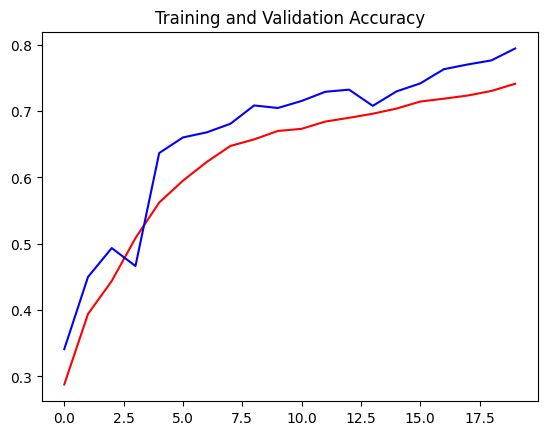

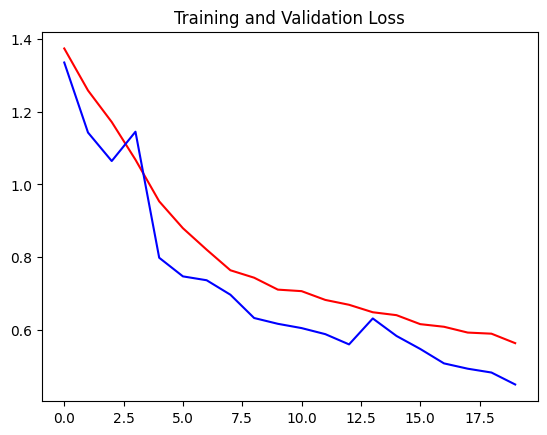

In [14]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.show()

plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.title("Training and Validation Loss")
plt.show()

In [15]:
model.evaluate(test_generator)

14/14 [==============================] - 7s 474ms/step - loss: 0.4372 - accuracy: 0.8002


[0.43722066283226013, 0.800235390663147]

In [16]:
model.save('Alzheimer_State_Detection.h5')

from google.colab import files
files.download('Alzheimer_State_Detection.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>